In [1]:
# Cargar funciones de la librería de python data analysis
import pandas as pd 

# Leer csv con datos y cargar en el dataframe data
data = pd.read_csv("data/creditos.csv") 

# Preview de las 5 primeras filas de data 
data.head()

,id,fechaHora,nacionalidad,nacimiento,sexo,est_civil,ocup_cargo,cliente_nuevo_o_recurrente,prestamo_renovacion_paralelo,monto_solicitado,...,capital,interes,interesPagado,vigente,saldo,saldoInteresGS,ventaCartera,importeVentaCartera,tipoCartera,resultadoFinal
0,1,2016-03-23 16:57:50.0000000,PY,1984-01-28 00:00:00.0000000,M,S,EMPLEADO,R,3,1500000,...,1852566.0,250645.0,250645.0,NO,0.0,0.0,0,0.0,NaN,BIEN
1,2,2016-03-28 15:35:31.0000000,PY,1966-11-13 00:00:00.0000000,F,S,EMPLEADO,R,2,9969326,...,11806177.0,7237203.0,4657926.0,SI,8290750.0,2817630.0,0,0.0,NORMAL,BIEN
2,3,2016-03-16 12:35:42.0000000,PY,1963-01-31 00:00:00.0000000,M,S,EMPLEADO,R,2,-2369825,...,8183185.0,2041828.0,3045159.0,NO,0.0,0.0,0,0.0,NORMAL,BIEN
3,4,2016-03-28 10:05:32.0000000,PY,1962-08-08 00:00:00.0000000,M,C,EMPLEADO,R,2,5000000,...,6309517.0,2555180.0,3072230.0,NO,0.0,0.0,1,5535856.0,NORMAL,MAL
4,5,2016-03-15 11:34:44.0000000,PY,1977-03-31 00:00:00.0000000,M,S,EMPLEADO,N,3,2000000,...,2493847.0,438468.0,670072.0,NO,0.0,0.0,1,912730.0,NaN,MAL


In [2]:
import numpy as np

# calcular variable edad a partir de fecha de solicitud - fecha de nacimiento
data['fechaHora'] = pd.to_datetime(data['fechaHora'])
data['nacimiento'] = pd.to_datetime(data['nacimiento'])
data['edad'] = ((data['fechaHora']-data['nacimiento'])/np.timedelta64(1,'Y')).astype(int)

# seleccionar variables de la solicitud, sistema financiero y target, descartar variables pos aprobación
df1 = data.iloc[:,2:3]
df2 = data.iloc[:,83:84]
df3 = data.iloc[:,4:68]
df4 = data.iloc[:,82:83]

# Unificar en un dataframe filtrado
df = pd.concat([df1,df2,df3,df4], axis=1)
df.head()

,nacionalidad,edad,sexo,est_civil,ocup_cargo,cliente_nuevo_o_recurrente,prestamo_renovacion_paralelo,monto_solicitado,plazo_solicitado,forma_de_pago,...,respuesta_iconf_mor_saldo_abiertas_telco_dol,respuesta_iconf_mor_saldo_abiertas_sf_gs,respuesta_iconf_mor_saldo_abiertas_otros_dol,respuesta_iconf_mor_saldo_abiertas_spub_gs,respuesta_iconf_mor_saldo_abiertas_cable_gs,respuesta_iconf_mor_saldo_abiertas_ccredito_gs,respuesta_iconf_es_socio_accionista_gran_cont,respuesta_iconf_es_socio_accionista_no_gran_cont,respuesta_iconf_adefi_max_dias_atraso,resultadoFinal
0,PY,32,M,S,EMPLEADO,R,3,1500000,8,3,...,0,0,0,0,0,0.0,0,0,0,BIEN
1,PY,49,F,S,EMPLEADO,R,2,9969326,37,1,...,0,0,0,0,0,0.0,0,0,0,BIEN
2,PY,53,M,S,EMPLEADO,R,2,-2369825,0,3,...,0,0,0,0,0,0.0,0,0,0,BIEN
3,PY,53,M,C,EMPLEADO,R,2,5000000,24,3,...,0,0,0,0,0,0.0,0,0,0,MAL
4,PY,38,M,S,EMPLEADO,N,3,2000000,12,3,...,0,0,0,0,0,0.0,0,0,0,MAL


In [3]:
# Identificar variables categoricas
df.dtypes[df.dtypes=='object']
#df["nacionalidad"].unique()

nacionalidad                  object
sexo                          object
est_civil                     object
ocup_cargo                    object
cliente_nuevo_o_recurrente    object
tiene_visa_classic            object
tiene_visa_gold               object
tiene_mc_gold                 object
tiene_fc                      object
tiene_mc_classic              object
respuesta_iconf_faja_score    object
resultadoFinal                object
dtype: object

In [4]:
# cargar codificador por etiquetas (LabelEncoder)
from sklearn import preprocessing

# Codificar cada variable categorica con su propio encoder
leNacionalidad = preprocessing.LabelEncoder()
df["nacionalidad"] = leNacionalidad.fit_transform(df["nacionalidad"])
leSexo = preprocessing.LabelEncoder()
df["sexo"] = leSexo.fit_transform(df["sexo"].astype(str))
leEstCivil = preprocessing.LabelEncoder()
df["est_civil"] = leEstCivil.fit_transform(df["est_civil"].astype(str))
leOcupCargo = preprocessing.LabelEncoder()
df["ocup_cargo"] = leOcupCargo.fit_transform(df["ocup_cargo"].astype(str))
leClienteNoR = preprocessing.LabelEncoder()
df["cliente_nuevo_o_recurrente"] = leClienteNoR.fit_transform(df["cliente_nuevo_o_recurrente"])
leTieneVC = preprocessing.LabelEncoder()
df["tiene_visa_classic"] = leTieneVC.fit_transform(df["tiene_visa_classic"])
leTieneVG = preprocessing.LabelEncoder()
df["tiene_visa_gold"] = leTieneVG.fit_transform(df["tiene_visa_gold"])
leTieneMG = preprocessing.LabelEncoder()
df["tiene_mc_gold"] = leTieneMG.fit_transform(df["tiene_mc_gold"])
leTieneFC = preprocessing.LabelEncoder()
df["tiene_fc"] = leTieneFC.fit_transform(df["tiene_fc"])
leTieneMC = preprocessing.LabelEncoder()
df["tiene_mc_classic"] = leTieneMC.fit_transform(df["tiene_mc_classic"])
leFaja = preprocessing.LabelEncoder()
df["respuesta_iconf_faja_score"] = leFaja.fit_transform(df["respuesta_iconf_faja_score"].astype(str))
leResultadoFinal = preprocessing.LabelEncoder()
df["resultadoFinal"] = leResultadoFinal.fit_transform(df["resultadoFinal"])

df.head()

,nacionalidad,edad,sexo,est_civil,ocup_cargo,cliente_nuevo_o_recurrente,prestamo_renovacion_paralelo,monto_solicitado,plazo_solicitado,forma_de_pago,...,respuesta_iconf_mor_saldo_abiertas_telco_dol,respuesta_iconf_mor_saldo_abiertas_sf_gs,respuesta_iconf_mor_saldo_abiertas_otros_dol,respuesta_iconf_mor_saldo_abiertas_spub_gs,respuesta_iconf_mor_saldo_abiertas_cable_gs,respuesta_iconf_mor_saldo_abiertas_ccredito_gs,respuesta_iconf_es_socio_accionista_gran_cont,respuesta_iconf_es_socio_accionista_no_gran_cont,respuesta_iconf_adefi_max_dias_atraso,resultadoFinal
0,1,32,1,3,7,1,3,1500000,8,3,...,0,0,0,0,0,0.0,0,0,0,0
1,1,49,0,3,7,1,2,9969326,37,1,...,0,0,0,0,0,0.0,0,0,0,0
2,1,53,1,3,7,1,2,-2369825,0,3,...,0,0,0,0,0,0.0,0,0,0,0
3,1,53,1,0,7,1,2,5000000,24,3,...,0,0,0,0,0,0.0,0,0,0,1
4,1,38,1,3,7,0,3,2000000,12,3,...,0,0,0,0,0,0.0,0,0,0,1


In [5]:
# Verificar inversa de codificacion
#leFaja.inverse_transform(df["respuesta_iconf_faja_score"])
leResultadoFinal.inverse_transform(df["resultadoFinal"])

array(['BIEN', 'BIEN', 'BIEN', ..., 'BIEN', 'MAL', 'BIEN'], dtype=object)

In [74]:
#Import svm model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# se usan todas las variables input
X = df.iloc[:,0:66]

# Normalizacion a [0-1]
min_max_scaler = preprocessing.MinMaxScaler()
xNorm = pd.DataFrame(min_max_scaler.fit_transform(X.values))

# variable target
y = df['resultadoFinal']   # BIEN=0, MAL=1

#Create GridSearchCV & kNN classifier
parameters = {'n_neighbors': [5, 10, 20, 40, 60, 80, 100], 
                 'weights': ['distance']}

clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = parameters, cv=5)
clf.fit(xNorm, y)
print("\nBest Validation Score: ", clf.best_score_)
print("\nBest Params: ",clf.best_params_)


Best Validation Score:  0.8010485875980962

Best Params:  {'n_neighbors': 40, 'weights': 'distance'}


In [75]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#train test split
X_train, X_test, y_train, y_test = train_test_split(xNorm, y, test_size=0.3, random_state=1)

#Train & Validation with best classifier 
clf = KNeighborsClassifier(n_neighbors=40, weights='distance')
clf.fit(xNormTrain, y_train)

#Predict the response for test dataset
y_pred = clf.predict(xNormTest)

print("\nTrain Score:",clf.score(xNormTrain, y_train))
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.precision_recall_fscore_support(y_test, y_pred, average=None)


Train Score: 1.0

Accuracy: 0.8013422818791947


(array([0.80921986, 0.6625    ]),
 array([0.97688356, 0.16459627]),
 array([0.88518231, 0.26368159]),
 array([1168,  322], dtype=int64))

In [71]:
# Calcular matriz de confusion
pd.crosstab(y_test, y_pred, 
            rownames=['actual'], 
            colnames=['pred'], margins=False, margins_name="Total")

pred,0,1
actual,,
0,1141,27
1,269,53


In [47]:
# Obtener scores de clasificación en las clases 0 o 1
y_scores = clf.predict_proba(xNormTest)

# Crear dataframe de predicciones con scores, filtrar segun criterio de aprobacion (80%)
dp = pd.DataFrame(zip(y_test,y_pred,y_scores[:,0],y_scores[:,1]), columns=['actual','pred','prob_yes','prob_no'])
dp

,actual,pred,prob_yes,prob_no
0,0,0,0.950341,0.049659
1,0,0,0.840511,0.159489
2,0,0,0.902710,0.097290
3,1,0,0.897172,0.102828
4,0,0,0.848471,0.151529
...,...,...,...,...
1485,0,0,0.949591,0.050409
1486,0,0,0.950681,0.049319
1487,0,0,0.672445,0.327555
1488,0,0,0.900582,0.099418


In [72]:
# Criterio de aprobación
aprob = 0.70
dp.loc[dp['prob_yes'] >= aprob, 'pred2'] = 0 # BIEN (>= aprob)
dp.loc[dp['prob_yes'] < aprob, 'pred2'] = 1 # MAL (< aprob)

# matriz de confusión con criterio de aprobación
print(pd.crosstab(dp['actual'], dp['pred2'], 
            rownames=['actual'], 
            colnames=['pred'], margins=False, margins_name="Total"))

# métricas con criterio de aprobación
print("\nAccuracy:",metrics.accuracy_score(dp['actual'], dp['pred2']))
metrics.precision_recall_fscore_support(dp['actual'], dp['pred2'], average=None)


pred    0.0  1.0
actual          
0       997  171
1       179  143

Accuracy: 0.7651006711409396


(array([0.84778912, 0.45541401]),
 array([0.85359589, 0.44409938]),
 array([0.85068259, 0.44968553]),
 array([1168,  322], dtype=int64))

0.7160871160554753


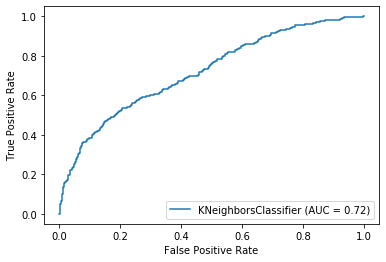

In [73]:
# ROC Curve
import numpy as np
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_scores[:,1]))
metrics.plot_roc_curve(clf, xNormTest, y_test)